**Gold Export Data**

**Importing Libraries **

The first step in the notebook involves importing the required libraries. These libraries are
the backbone of the analysis and modeling processes. Pandas and NumPy are used for
handling and manipulating the dataset. Scikit-learn provides tools for data preprocessing,
splitting datasets, and building machine learning models. Seaborn and Matplotlib are used
for creating visualizations to understand the data. LightGBM is used for training the model
due to its efficiency and support for categorical features. Statsmodels provides tools for
time-series forecasting.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

**Data Loading & Preprocessing**

The dataset is loaded into a Pandas DataFrame using the `read_excel` function. Basic
information about the dataset is explored using `data.info()` and `data.describe()`. These
functions provide an overview of the dataset's structure, including column names, data
types, and missing values.
To handle missing data, a heatmap is created to visualize where null values exist in the
dataset. Date columns are converted into datetime objects to facilitate time-based analysis.
Additional features such as 'Year' and 'Month' are extracted for aggregation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  163 non-null    object 
 1   freqCode                  163 non-null    object 
 2   refPeriodId               163 non-null    int64  
 3   refYear                   163 non-null    int64  
 4   refMonth                  163 non-null    int64  
 5   period                    163 non-null    int64  
 6   reporterCode              163 non-null    int64  
 7   reporterISO               163 non-null    object 
 8   reporterDesc              163 non-null    object 
 9   flowCode                  163 non-null    object 
 10  flowDesc                  163 non-null    object 
 11  partnerCode               163 non-null    int64  
 12  partnerISO                163 non-null    object 
 13  partnerDesc               163 non-null    object 
 14  partner2Co

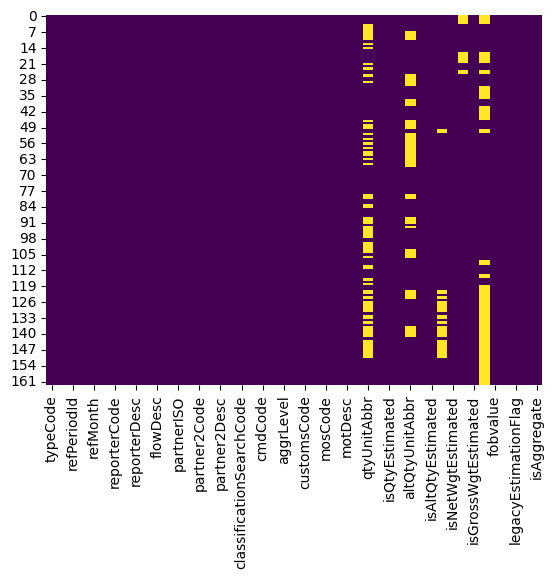

In [ ]:
# Load and inspect the dataset
data = pd.read_excel('/content/SA & UG.xlsx')
data.info()
data.describe()
# Handle missing values and date processing
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()
data['refPeriodId'] = pd.to_datetime(data['refPeriodId'], format='%Y%m%d')
data['Year'] = data['refPeriodId'].dt.year
data['Month'] = data['refPeriodId'].dt.month

###Exploratory Data Analysis (EDA)

For EDA, I created various visualizations to understand trends and patterns in the dataset.
EDA is performed to better understand the dataset. Line plots are created to analyze trends
in FOBValue over the years for different countries. Boxplots help visualize variations in
FOBValue by country, while heatmaps show correlations between numerical variables.

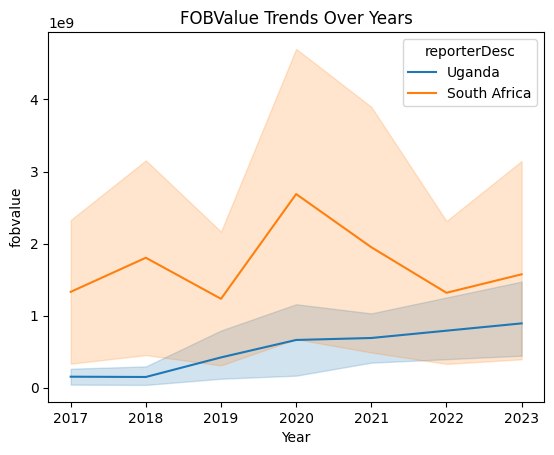

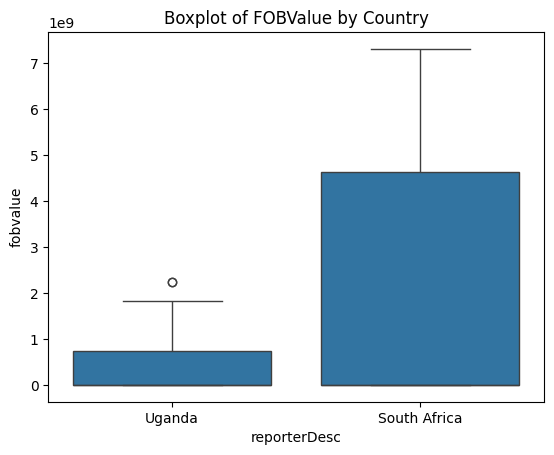

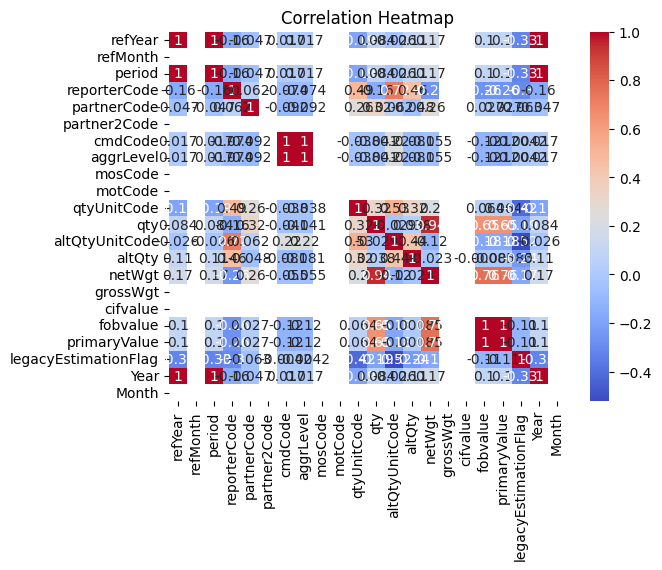

In [ ]:
# Line plot for trends
sns.lineplot(data=data, x='Year', y='fobvalue', hue='reporterDesc')
plt.title('FOBValue Trends Over Years')
plt.show()
# Boxplot for variations by country
sns.boxplot(data=data, x='reporterDesc', y='fobvalue')
plt.title('Boxplot of FOBValue by Country')
plt.show()
# Correlation heatmap
numeric_data = data.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###Feature Engineering

To improve model performance, new features are created. For instance, 'lag_1' is added to
include the previous value of FOBValue as a predictor. Rolling statistics such as mean and
standard deviation are calculated to capture trends over time. These features help the
model better understand the patterns in the data.

In [ ]:
# Feature engineering
data['lag_1'] = data['fobvalue'].shift(1)
data['rolling_mean_3'] = data['fobvalue'].rolling(3).mean()
data['rolling_std_3'] = data['fobvalue'].rolling(3).std()
data.dropna(inplace=True)

Modeling & Forecasting

I used four different models to train and evaluate the dataset:
1. Random Forest Regressor: A robust tree-based ensemble model that handles non-linear
relationships well.
2. LightGBM: A gradient boosting framework optimized for speed and efficiency,
particularly with large datasets.
3. SARIMAX: A time-series model that accounts for seasonality and trends in the data.
4. Linear Regression: A simple baseline model to compare against more complex algorithms.
Each model was trained using a train-test split, and their performance was evaluated using
metrics like Mean Squared Error (MSE) and R-squared.
The dataset is split into training and testing sets using `train_test_split`. Categorical columns
are encoded using LabelEncoder to convert them into numeric form. A LightGBM model is
trained, and its hyperparameters are optimized using `GridSearchCV`. This approach
ensures the model performs well by finding the best parameter configuration.

In [ ]:
# Train-test split
X = data.drop(columns=['fobvalue'])
y = data['fobvalue']
# Identify categorical features
categorical_features = X.select_dtypes(include=['object', 'datetime64[ns]']).columns.tolist()
# Convert categorical features to numerical using Label Encoding
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# LightGBM training and optimization
param_grid = {
'n_estimators': [100, 200],
'max_depth': [5, 10],
'learning_rate': [0.01, 0.1]
}
lgbm = LGBMRegressor(random_state=42)
grid = GridSearchCV(lgbm, param_grid, scoring='neg_mean_squared_error', cv=3)
# Fit the model, explicitly specifying categorical features
grid.fit(X_train, y_train, categorical_feature=categorical_features)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there ar

GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

Comparing Models & Visualizing Results

The model's performance is evaluated using metrics like Mean Squared Error (MSE) and R
squared (R2). Scatter plots are created to compare actual and predicted values, helping to
assess how well the model has generalized. These evaluations are critical for identifying
areas where the model might need improvement.

MSE: 7.295304474682525e+18, R2: -0.02988660108693364


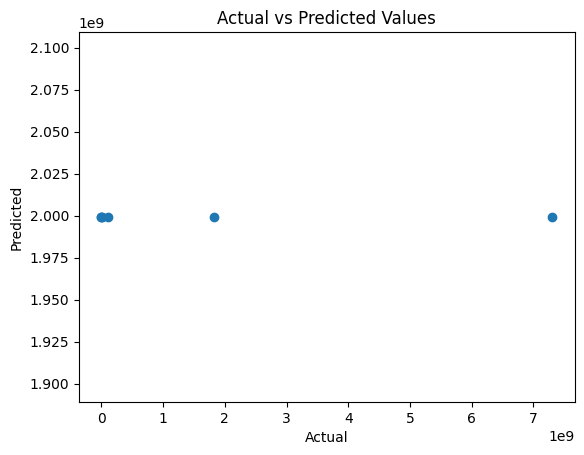

In [ ]:
# Model evaluation
y_pred = grid.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R2: {r2}')
# Visualization of results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()